# Section 5.1: Thermometer

In [1]:
import numpy as np
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w, b):
    return w*t_u + b

def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

In [4]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
print(t_p)
loss = loss_fn(t_p, t_c)
print(loss)

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor(1763.8846)


In [5]:
def dloss_fn(t_p, t_c):
    return 2*(t_p - t_c)/t_u.shape[0]

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_p, t_c, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_p, t_c, w, b)
        params -= grad*learning_rate
        if epochs < 200:
            print("Epoch {}, Loss = {:.2f}, Params = {}, Grad = {}".format(epoch, loss, params, grad))
    return params

In [6]:
params = training_loop(100, 1e-4, torch.tensor([1.0, 0.0]), t_u, t_c)

Epoch 1, Loss = 1763.88, Params = tensor([ 0.5483, -0.0083]), Grad = tensor([4517.2969,   82.6000])
Epoch 2, Loss = 323.09, Params = tensor([ 0.3623, -0.0118]), Grad = tensor([1859.5493,   35.7843])
Epoch 3, Loss = 78.93, Params = tensor([ 0.2858, -0.0135]), Grad = tensor([765.4667,  16.5122])
Epoch 4, Loss = 37.55, Params = tensor([ 0.2543, -0.0143]), Grad = tensor([315.0790,   8.5787])
Epoch 5, Loss = 30.54, Params = tensor([ 0.2413, -0.0149]), Grad = tensor([129.6733,   5.3127])
Epoch 6, Loss = 29.35, Params = tensor([ 0.2360, -0.0153]), Grad = tensor([53.3495,  3.9682])
Epoch 7, Loss = 29.15, Params = tensor([ 0.2338, -0.0156]), Grad = tensor([21.9303,  3.4148])
Epoch 8, Loss = 29.11, Params = tensor([ 0.2329, -0.0159]), Grad = tensor([8.9964, 3.1869])
Epoch 9, Loss = 29.11, Params = tensor([ 0.2325, -0.0162]), Grad = tensor([3.6721, 3.0930])
Epoch 10, Loss = 29.11, Params = tensor([ 0.2324, -0.0166]), Grad = tensor([1.4803, 3.0544])
Epoch 11, Loss = 29.10, Params = tensor([ 0.2323

We can see that at the 1st epoch, the gradient of w is 50 time bigger than b, that means they are in difference scale -> we need difference learning rate for each  
We can also normalize the input instead!!!

In [7]:
t_un = t_u * 0.1
params = training_loop(5000, 1e-2, torch.tensor([1.0, 0.0]), t_un, t_c)
print(params)

tensor([  5.3671, -17.3012])


The thermometer is showing number in Fahrenheit degree!

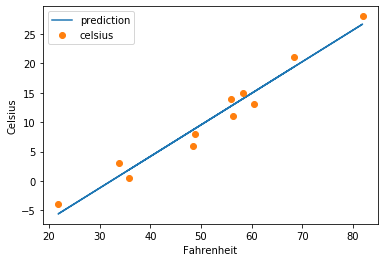

In [8]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
plt.plot(t_u.numpy(), t_p.numpy(), label = "prediction")
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = "celsius")
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.legend()